KNN: classificação - aprendizado supervisionado - considera a proximidade entre dados, permitindo realizar predições (classificação Sim ou Não, etc.) ou predição do tipo regressão com o KNNR. Considera que dados similares tendem a estar concentrados na mesma região do espaço quando submetidos à dispersão
Funciona bem para classes linearmente separáveis, também para não lineares, mas para estas últimas uma rede neural é melhor. Normalmente o K é ímpar para evitar 'dúvida' na classificação, algo como [9,11] mas pode-se ir testando a partir de 1 checando a acurácia

Baseado em medidas no espaço cartesiano entre os pontos:
- Euclidiana
- Manhattan
- Minkowski: generalização entre Euclidiana (p = 2) e Manhattan (p = 1). No sklearn tem que setar o p, pois usa Minkowski
- Jaccard

KNN calcula distância para todos os objetos. Pode ter problema de desempenho a depender do tamanho do dataset e features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


Iris Flower DATASET: https://www.kaggle.com/arshid/iris-flower-dataset

In [2]:
df = pd.read_csv('../datasets/iris.csv')
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Mudando o nome da coluna species para target

In [3]:
df.rename(columns={'species': 'target'}, inplace=True) # inplace = True não cria novo dataframe, altera o atual
db = df.copy() # mantenho db como cópia de df completo
df


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


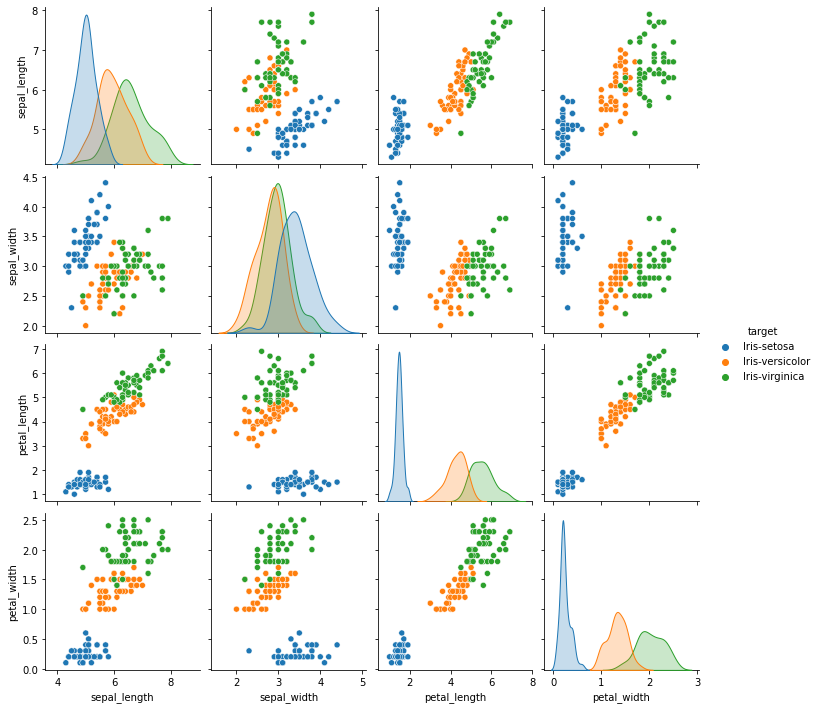

In [4]:
sb.pairplot(db, hue='target') # dispersão entre as colunas de dados, sem a coluna de classificação SPECIES

In [9]:
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.describe(include='object') # Confirma quantas classes tem - neste caso já sabemos previamente (UNIQUE)

,target
count,150
unique,3
top,Iris-versicolor
freq,50


Remover do dataframe a coluna target, pois já contém a classificação. A ideia é rodar o k-means para ele fazer o agrupamento e comparar com a classificação já existente. Vamos criar um array para as features X

In [5]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

db['target_encoded'] = encoder.fit_transform(db['target'])

print(encoder.classes_)



['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [8]:
X = np.array(db.drop(columns=['target','target_encoded'], axis=1)) # cria array numpy a partir do dataframe, removendo a coluna 'target'. axis = 1 informa que target é coluna e não linha

In [10]:
X #features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Separar as classes do dataframe, criando um array:

In [11]:
y = np.array(db['target_encoded']) #coluna alvo (exemplos)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Importar KNN, da lib scikt-Learn

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Dividir conjuntos de treino e teste. O random_state é comum em ML, para permitir, se desejável na fase de testes, a reprodutibilidade dos resultados, ao setar uma semente fixa. Se deixar vazio, a cada RUN, o resultado varia.

In [17]:
# treino com 70%, valida com 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=30) 
knn.fit(X_train, y_train) # Treino com todas as features !!!

KNeighborsClassifier(n_neighbors=3)

In [18]:
s = y_test.size
y_knn = []
for i in range(s):
    y_knn.append(knn.predict([X_test[i,:]])) # vetor contendo as features
y_knn
print('Medindo a acurácia do KNN (%): {}'.format(accuracy_score(y_knn, y_test, normalize=True)*100)) #normalize=True, fração dos corretos

Medindo a acurácia do KNN (%): 93.33333333333333


C:\Users\josen\anaconda3\lib\site-packages\pandas\core\internals\construction.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,0
0,"[[0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0,..."
1,"[0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, ..."
